# Project: Wrangling and Analyze Data

In [88]:
# Imported packages

import pandas as pd
import numpy as np

import requests
import tweepy
import json

import logging
import pprint
import os

from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timezone
from dotenv import load_dotenv


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
### 1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_tweets_enhanced = pd.read_csv("twitter-archive-enhanced.csv")
df_tweets_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
def image_pred_download():
    # folder = "img_pred_folder"
    # if not os.path.exists(folder):
    #     os.makedirs(folder)

    image_pred_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    image_pred_response = requests.get(image_pred_url)

    with open("image-predictions.tsv", "wb") as file:
        file.write(image_pred_response.content)

    return pd.read_csv("image-predictions.tsv", sep='\t')

df_image_pred = image_pred_download()

In [4]:
df_image_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Importing authentication keys

load_dotenv()
my_key = os.getenv('API_KEY')
my_secret = os.getenv('API_KEY_SECRET')
access_token = os.getenv('ACCESS_TOKEN')
access_token_secret = os.getenv('ACCESS_TOKEN_SECRET')
my_token = os.getenv('MY_TOKEN')


In [6]:
# Setting up basic configuration for logging so as to log status and errors during API calls/requests 

logging.basicConfig(level=logging.DEBUG, filename="log.log", filemode="w", format="%(asctime)s - %(levelname)s - %(message)s")

In [7]:
# OAuth 1.0a Authorization

auth = tweepy.OAuth1UserHandler(my_key, my_secret, access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
# OAuth 2.0 Authentication

client = tweepy.Client(bearer_token=my_token, 
                        consumer_key=my_key, 
                        consumer_secret=my_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret,
                        return_type=dict)


In [9]:
# Making a list of all the tweet ids from the given dataset

id_list = list(df_tweets_enhanced.tweet_id)


In [10]:
# Defining a function to get details tweets by id using OAuth 2.0.

def get_tweets_detailed(id_list):

        """
        I am getting these tweet fields because I plan using them
        for analysis in the future though for this current analysis,
        I will only be using the public metrics.
        """
        tweet_fields = [
            'id',
            'text',
            'created_at',
            'public_metrics',
            'source',
            'entities',
            'reply_settings',
        ]
        return client.get_tweets(id_list, tweet_fields=tweet_fields)
 
        


In [11]:
# Function to save tweets in a text file
def save_tweets_detailed():
    with open("tweet_detailed_json.txt", "w") as file:
        file.write(json.dumps(tweets_detailed))

# Frunction to read the tweets from the text file
def read_tweets_detailed():
    with open("tweet_detailed_json.txt") as file:
        json_obj = json.load(file)
    return json_obj


In [12]:
"""
Creating a function to get tweets in batches because of Twtter's rate limit.
Using the get_tweets method, up to 100 tweets can be gotten with a single HTTP
request. That means all 2400+ tweet data can be gotten at once (with no wait time) 
since we are making only 25 HTTP requests in total (instead of 2400+ requests)

Also, in order to prevent making unnecesary HTTP requests and prevent overwriting
vital data, I have made it so the function only executes if the .txt file does not exist
in the current directory.
"""

def get_tweet_in_batches(list_of_ids, batch_size=100):
    if not os.path.exists('tweet_detailed_json.txt'):
        index = 0
        id_queue = []
        tweets_detailed = []
        while len(id_queue) == batch_size or not id_queue:
            id_queue = list_of_ids[index:(index+batch_size)]
            """
            The get_tweets that was defined above will return a dict object because that 
            is the return type that was set in the client call. It returns a dictionary 
            with a single key "data" and a list of JSON objects as the value. Each object 
            in the list corresponds to a single tweet.
            """
            logging.debug(f"Getting tweets {index} to {index+batch_size}")
            tweets_detailed.extend(iter(get_tweets_detailed(id_queue)['data']))
            index += batch_size
        return tweets_detailed
    else:
        logging.warning("""
                    A tweet_detailed_json.txt file already exists in current directory. 
                    If you want to make new HTTP requests with this function, delete 
                    the 'tweet_detailed_json.txt' file from current directory
                    """)
        return read_tweets_detailed()


# Calling the function to get data for all tweets in the tweet list
tweets_detailed = get_tweet_in_batches(list_of_ids=id_list)

In [13]:
# Confirming the tweets' data was queried properly
pprint.pprint(tweets_detailed[0])


{'created_at': '2017-08-01T16:23:56.000Z',
 'entities': {'annotations': [{'end': 14,
                               'normalized_text': 'Phineas',
                               'probability': 0.6637,
                               'start': 8,
                               'type': 'Person'}],
              'urls': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
                        'end': 109,
                        'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
                        'media_key': '3_892420639486877696',
                        'start': 86,
                        'url': 'https://t.co/MgUWQ76dJU'}]},
 'id': '892420643555336193',
 'public_metrics': {'like_count': 33797,
                    'quote_count': 219,
                    'reply_count': 139,
                    'retweet_count': 6999},
 'reply_settings': 'everyone',
 'source': 'Twitter for iPhone',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole

In [14]:
# Confirming the number of tweets queried
len(tweets_detailed)

2327

In [15]:
# Saving the detailed tweet data to a text file
save_tweets_detailed()

In [16]:
# Reading the detailed tweet data from the text file
tweets_detailed = read_tweets_detailed()

In [17]:
# Functions to extract only the public metrics from the detailed tweet data and store in a text file

def get_tweets_data():
    tweet_data = []
    for data in tweets_detailed:
        data["public_metrics"]["tweet_id"] = data['id']
        data["public_metrics"]["created_at"] = data['created_at']
        tweet_data.append(data["public_metrics"])
    return tweet_data

def save_tweets_data():
    with open("tweet_json.txt", "w") as file:
        file.write(json.dumps(get_tweets_data()))

save_tweets_data()


In [18]:
# Reading the tweets' data to a pandas dataframe

df_public_metrics = pd.read_json("tweet_json.txt")
df_public_metrics

,retweet_count,reply_count,like_count,quote_count,tweet_id,created_at
0,6999,139,33797,219,892420643555336192,2017-08-01 16:23:56+00:00
1,5298,170,29314,274,892177421306343424,2017-08-01 00:17:27+00:00
2,3477,109,22044,145,891815181378084864,2017-07-31 00:18:03+00:00
3,7220,142,36917,286,891689557279858688,2017-07-30 15:58:51+00:00
4,7753,193,35297,296,891327558926688256,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2322,37,9,89,0,666049248165822464,2015-11-16 00:24:50+00:00
2323,115,1,247,2,666044226329800704,2015-11-16 00:04:52+00:00
2324,36,1,100,0,666033412701032448,2015-11-15 23:21:54+00:00
2325,39,0,112,0,666029285002620928,2015-11-15 23:05:30+00:00


In [19]:
# Saving the new twitter data to a csv
df_public_metrics.to_csv('tweets_public_metrics.csv', index=False)
logging.debug("Successfully saved df_public_metrics to tweets_public_metrics.csv in current directory")
# if os.path.exists('tweets_public_metrics.csv'):
# else:
#     logging.warning("CSV file was not created")

In [20]:
# Function to get information for a list of tweet ids using OAuth 1.0a

def get_tweets_single(id_list):
    """
    This function makes a HTTP request for each tweet one by one
    """
    for tweet_id in id_list:
        try:
            logging.debug('get_tweets_single: fetching tweet for ID %s', tweet_id)
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print(f"{tweet_id}, {tweet.text.encode('UTF-8')}")
            print(f"{tweet_id}, {tweet.favorite_count}")
            print(f"{tweet_id}, {tweet.retweet_count}")
            return tweet
        except tweepy.TweepyException as te:
            logging.warn('get_tweets_single: failed to get tweet ID %s: %s', tweet_id, te.message)



## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [21]:
df_tweets_enhanced["in_reply_to_status_id"].isnull().sum()

# df_tweets_enhanced.sort_values(by=['rating_denominator']).head()
# df_tweets_enhanced.sort_values(by=['rating_denominator']).query("tweet_id == 835246439529840640").text

# df_tweets_enhanced["rating_denominator"].value_counts()
# df_tweets_enhanced.groupby('rating_numerator')["rating_numerator"].count()

df_public_metrics["like_count"].value_counts()
df_public_metrics.query("like_count == 0")

df_tweets_enhanced[df_tweets_enhanced["in_reply_to_status_id"].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


### Quality issues
1. Large number of missing values in the following columns: 
	in_reply_to_status_id, 
	in_reply_to_user_id, 
	retweeted_status_id, 
	retweeted_status_user_id, 
	retweeted_status_timestamp

2. 181 of the tweets are retweets (since they have a retweet status id) and some are replys
   
3. id columns (column names ending with 'id') are in numeric datatype instead of string datatype

4. Timestamp columns are string instead of datetime datatype

5. None values interpreted as string in dog stage columns

6. Some of the rating denominator values are not exactly 10 and the numerators values are unusually high

7. Dog prediction names are separated by underscores instead of spaces and they are not capitalized

8.  There are 160 tweets that have 0 replys, likes and quotes but they somehow have retweets

### Tidiness issues
1. URLs in the `source` column are all the same

2. Dog stage variable is in multiple columns instead of one
   
3. Top 3 image prediction results are in 3 seperate column sets instead of one set of columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data

df_copy_image_pred = df_image_pred.copy()
df_copy_public_metrics = df_public_metrics.copy()
df_copy_tweets_enhanced = df_tweets_enhanced.copy()

### Issue #1:

#### Define

- From the `tweets enhanced` table, remove rows that have `retweeted status id` since they are retweets and are not needed for this analysis.
- Also remove rows that have reply_status_id and reply_status_user_id

#### Code

In [23]:
# Checking the shape before removing rows
df_copy_tweets_enhanced.shape

(2356, 17)

In [24]:
# Removing the rows
df_copy_tweets_enhanced = df_copy_tweets_enhanced[df_tweets_enhanced["retweeted_status_id"].isna(
)]

# Droping the columns 
df_copy_tweets_enhanced.drop(columns=['retweeted_status_id',
                                      'retweeted_status_user_id',
                                      'retweeted_status_timestamp',
                                      'in_reply_to_status_id',
                                      'in_reply_to_user_id'],
                             inplace=True)


#### Test

In [25]:
# Checking the shape after removing the rows

df_copy_tweets_enhanced.shape

(2175, 12)

### Issue #2:

#### Define

Change `id` columns to string datatype in the 3 tables, since they will not be used for any arithmetic operation

#### Code

In [26]:
df_copy_image_pred.info()
df_copy_public_metrics.info()
df_copy_tweets_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   retweet_count  2327 non-null   int64              


In [27]:
df_copy_image_pred = df_copy_image_pred.astype({'tweet_id':'str'})
df_copy_public_metrics = df_copy_public_metrics.astype({'tweet_id':'str'})
df_copy_tweets_enhanced = df_copy_tweets_enhanced.astype({'tweet_id':'str'})

#### Test

In [28]:
df_copy_image_pred.info()
df_copy_public_metrics.info()
df_copy_tweets_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   retweet_count  2327 non-null   int64              


### Issue #3:

#### Define

Change `timestamp` column to datetime datatype

#### Code

In [29]:
# Confirming the timestamp column is currently a string datatype
df_copy_tweets_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(2), object(10)
memory usage: 220.9+ KB


In [30]:
# Changing the timestamp column datatype to datetime
df_copy_tweets_enhanced['timestamp'] = pd.to_datetime(df_copy_tweets_enhanced['timestamp'])


#### Test

In [31]:
df_copy_tweets_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #4:

#### Define

Replace 'None' string to NaN datatype in the dog stage columns

#### Code

In [32]:
# Confirming that the last 4 columns are showing 2175 values each
df_copy_tweets_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [33]:
def replace_none_values():
    for column in df_copy_tweets_enhanced.columns:
        df_copy_tweets_enhanced[column].replace('None', np.nan, inplace=True)

replace_none_values()

#### Test

In [34]:
# Confirming that None strings have been properly converted to NaNs
df_copy_tweets_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1495 non-null   object             
 8   doggo               87 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              234 non-null    object             
 11  puppo               25 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #5:

#### Define

Remove all the rows where the denominator is not exactly 10 since those are not proper dog ratings and the original tweets do not have any dog rating.

#### Code

In [35]:
# Checking for rows with denominator not equal to 10
df_copy_tweets_enhanced[df_copy_tweets_enhanced['rating_denominator'] != 10].head()
df_copy_tweets_enhanced[df_copy_tweets_enhanced['rating_denominator'] != 10].shape

(22, 12)

In [36]:
# Confirming the number of rows before dropping the rows
df_copy_tweets_enhanced.shape

(2175, 12)

In [37]:
# Replacing the dataframe with filtered dataframe
df_copy_tweets_enhanced = df_copy_tweets_enhanced[df_copy_tweets_enhanced['rating_denominator'] == 10]

#### Test

In [38]:
# Confirming that the number of rows has reduced
df_copy_tweets_enhanced.shape

(2153, 12)

### Issue #6:

#### Define

Remove the underscores in the dog breed names and capitalize them

#### Code

In [39]:
df_copy_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [40]:
def reformat_dog_breed_names():
    columns = ['p1', 'p2', 'p3'] # List of columns to be worked on
    for column in columns:
        df_copy_image_pred[column] = df_copy_image_pred[column].apply(lambda x: " ".join(x.split('_')).title())
        df_copy_image_pred[column] = df_copy_image_pred[column].apply(lambda x: " ".join(x.split('_')).title())

reformat_dog_breed_names()

#### Test

In [41]:
df_copy_image_pred.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #7:

#### Define

Remove tweets from the public_metrics table that don't have reply, likes or quotes.

#### Code

In [42]:
# Checking to see the tweets that have no reply, likes or quotes
df_copy_public_metrics.query("reply_count == 0 and like_count == 0 and quote_count == 0")


,retweet_count,reply_count,like_count,quote_count,tweet_id,created_at
31,93,0,0,0,886054160059072512,2017-07-15 02:45:48+00:00
35,15418,0,0,0,885311592912609280,2017-07-13 01:35:06+00:00
67,5737,0,0,0,879130579576475648,2017-06-26 00:13:58+00:00
72,1076,0,0,0,878404777348136960,2017-06-24 00:09:53+00:00
73,5521,0,0,0,878316110768087040,2017-06-23 18:17:33+00:00
...,...,...,...,...,...,...
995,901,0,0,0,746521445350707200,2016-06-25 01:52:36+00:00
1015,1872,0,0,0,743835915802583040,2016-06-17 16:01:16+00:00
1214,122,0,0,0,711998809858043904,2016-03-21 19:31:59+00:00
2230,28,0,0,0,667550904950915072,2015-11-20 03:51:52+00:00


In [43]:
# Confirming the shape before removing the tweets
df_copy_public_metrics.shape

(2327, 6)

In [44]:
df_copy_public_metrics = df_copy_public_metrics.query("reply_count != 0 or like_count != 0 or quote_count != 0")

#### Test

In [45]:
df_copy_public_metrics

,retweet_count,reply_count,like_count,quote_count,tweet_id,created_at
0,6999,139,33797,219,892420643555336192,2017-08-01 16:23:56+00:00
1,5298,170,29314,274,892177421306343424,2017-08-01 00:17:27+00:00
2,3477,109,22044,145,891815181378084864,2017-07-31 00:18:03+00:00
3,7220,142,36917,286,891689557279858688,2017-07-30 15:58:51+00:00
4,7753,193,35297,296,891327558926688256,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2322,37,9,89,0,666049248165822464,2015-11-16 00:24:50+00:00
2323,115,1,247,2,666044226329800704,2015-11-16 00:04:52+00:00
2324,36,1,100,0,666033412701032448,2015-11-15 23:21:54+00:00
2325,39,0,112,0,666029285002620928,2015-11-15 23:05:30+00:00


### Issue #8:

#### Define

Drop the `source` column from the `tweets_enhanced` table since they are the same across the column and not needed for this analysis.

#### Code

In [46]:
df_copy_tweets_enhanced.head(2)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


In [47]:
df_copy_tweets_enhanced.drop(columns=['source'], inplace=True)

#### Test

In [48]:
df_copy_tweets_enhanced.head(2)


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


### Issue #9:

#### Define

Merge the dog stage columns to one column.

#### Code

In [49]:
df_copy_tweets_enhanced.head(2)


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


In [50]:
# Changing all values in dog_stage column to NaN values
df_copy_tweets_enhanced['dog_stage'] = np.nan

# Indiviually applying the dog stage based on which dog stage column is populated
df_copy_tweets_enhanced['dog_stage'] = np.where(df_copy_tweets_enhanced['doggo'] == 'doggo', df_copy_tweets_enhanced['doggo'], df_copy_tweets_enhanced['dog_stage'])
df_copy_tweets_enhanced['dog_stage'] = np.where(df_copy_tweets_enhanced['floofer'] == 'floofer', df_copy_tweets_enhanced['floofer'], df_copy_tweets_enhanced['dog_stage'])
df_copy_tweets_enhanced['dog_stage'] = np.where(df_copy_tweets_enhanced['pupper'] == 'pupper', df_copy_tweets_enhanced['pupper'], df_copy_tweets_enhanced['dog_stage'])
df_copy_tweets_enhanced['dog_stage'] = np.where(df_copy_tweets_enhanced['puppo'] == 'puppo', df_copy_tweets_enhanced['puppo'], df_copy_tweets_enhanced['dog_stage'])


In [51]:
# Dropping unnecessary columns
df_copy_tweets_enhanced.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

#### Test

In [52]:
# Checking 'doggo' dog stage
df_copy_tweets_enhanced[df_copy_tweets_enhanced['dog_stage']=='doggo'].head()


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
43,884162670584377345,2017-07-09 21:29:42+00:00,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
99,872967104147763200,2017-06-09 00:02:31+00:00,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,doggo
108,871515927908634625,2017-06-04 23:56:03+00:00,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
110,871102520638267392,2017-06-03 20:33:19+00:00,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,NaN,doggo


In [53]:
# Checking 'puppo' dog stage
df_copy_tweets_enhanced[df_copy_tweets_enhanced['dog_stage']=='puppo'].head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
12,889665388333682689,2017-07-25 01:55:32+00:00,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,puppo
14,889531135344209921,2017-07-24 17:02:04+00:00,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
71,878776093423087618,2017-06-25 00:45:22+00:00,This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,puppo
94,874012996292530176,2017-06-11 21:18:31+00:00,This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,puppo
129,867421006826221569,2017-05-24 16:44:18+00:00,This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,puppo


### Issue #10:

#### Define

Convert wide data to long data by unpivoting image prediction columns

#### Code

In [54]:
df_copy_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [55]:
def melt_image_pred():
    columns_to_keep = ['tweet_id', 'jpg_url', 'img_num']

    columns_to_melt = ['p1', 'p2', 'p3']
    df_a = pd.melt(df_copy_image_pred, id_vars=columns_to_keep, value_vars=columns_to_melt, var_name='pred_rank', value_name='pred_name')

    columns_to_melt = ['p1_conf', 'p2_conf', 'p3_conf']
    df_b = pd.melt(df_copy_image_pred, id_vars=columns_to_keep, value_vars=columns_to_melt, var_name='pred_rank_', value_name='pred_conf')

    columns_to_melt = ['p1_dog', 'p2_dog', 'p3_dog']
    df_c = pd.melt(df_copy_image_pred, id_vars=columns_to_keep, value_vars=columns_to_melt, var_name='pred_rank__', value_name='pred_correct')

    # df_a = df_a.sort_values(by='tweet_id')
    # df_b = df_b.sort_values(by='tweet_id')

    df_a['pred_conf'], df_a['pred_correct'] = df_b['pred_conf'], df_c['pred_correct']

    return  df_a

In [56]:
df_copy_image_pred = melt_image_pred()

#### Test

In [57]:
df_copy_image_pred.head()
df_copy_image_pred.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      6225 non-null   object 
 1   jpg_url       6225 non-null   object 
 2   img_num       6225 non-null   int64  
 3   pred_rank     6225 non-null   object 
 4   pred_name     6225 non-null   object 
 5   pred_conf     6225 non-null   float64
 6   pred_correct  6225 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 298.0+ KB


## Joining All The Tables 

In [58]:
def merge_tables():
    table = pd.merge(df_copy_image_pred, df_copy_tweets_enhanced, how='inner', on='tweet_id')
    return pd.merge(table, df_copy_public_metrics, how='inner', on='tweet_id')

df_master = merge_tables()

In [60]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 3854
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            3855 non-null   object             
 1   jpg_url             3855 non-null   object             
 2   img_num             3855 non-null   int64              
 3   pred_rank           3855 non-null   object             
 4   pred_name           3855 non-null   object             
 5   pred_conf           3855 non-null   float64            
 6   pred_correct        3855 non-null   bool               
 7   timestamp           3855 non-null   datetime64[ns, UTC]
 8   text                3855 non-null   object             
 9   expanded_urls       3855 non-null   object             
 10  rating_numerator    3855 non-null   int64              
 11  rating_denominator  3855 non-null   int64              
 12  name                2763 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
df_master.to_csv('twitter_archive_master.csv', index=False)
df_copy_image_pred.to_csv('cleaned_image_pred.csv', index=False)
df_copy_public_metrics.to_csv('cleaned_public_metrics.csv', index=False)
df_copy_tweets_enhanced.to_csv('cleaned_tweets_enhanced.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### I have 3 questions I would like to analyze with this data.
1. Based on the algorithms predictions, what percent were correct (actual dog breeds) and what percentage were wrong?

In [90]:
df_master.head()
algo_pred = df_master.groupby(['pred_correct'])['pred_correct'].count()
algo_pred

pred_correct
False     996
True     2859
Name: pred_correct, dtype: int64

2. So far, what is the fastest retweeted tweet from the time it was posted?
   * In order to analize this, we have to find the ratio between the number of retweets and the age (in days) of the tweet.
   * To get the age of the tweet, I will add a calculated column for age
   * To get the retweet ratio, I will add a calculted column as well

In [86]:

def add_days_column():
    today = datetime.now(timezone.utc)
    df_master['days'] = df_master['created_at'].apply(lambda x: (today - x) / np.timedelta64(1, 'D')).astype('int')

def add_ratio_column():
    df_master['retweet_ratio'] = df_master['retweet_count'] / df_master['days']

add_days_column()
add_ratio_column()

top_tweets = df_master.drop_duplicates(subset=['tweet_id', 'days', 'retweet_ratio']).sort_values(by='retweet_ratio', ascending=False).head(10)
top_tweets

,tweet_id,jpg_url,img_num,pred_rank,pred_name,pred_conf,pred_correct,timestamp,text,expanded_urls,...,rating_denominator,name,dog_stage,retweet_count,reply_count,like_count,quote_count,created_at,days,retweet_ratio
3162,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,p1,Chihuahua,0.505370,True,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,...,10,Stephan,NaN,51627,908,111599,2975,2016-12-09 06:17:20+00:00,2043,25.270191
3285,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,p1,Standard Poodle,0.351308,True,2017-01-11 02:15:36+00:00,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,...,10,Bo,doggo,34528,237,82668,1030,2017-01-11 02:15:36+00:00,2010,17.178109
3597,859196978902773760,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,p1,Angora,0.224218,False,2017-05-02 00:04:57+00:00,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,...,10,quite,NaN,26270,520,80551,1307,2017-05-02 00:04:57+00:00,1899,13.833597
2703,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/76167...,1,p1,Gondola,0.318851,False,2016-08-05 21:19:27+00:00,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,...,10,NaN,NaN,26738,562,46282,2895,2016-08-05 21:19:27+00:00,2168,12.333026
3669,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,p1,Golden Retriever,0.841001,True,2017-06-01 20:18:38+00:00,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,...,10,Zoey,NaN,22731,750,73921,1018,2017-06-01 20:18:38+00:00,1868,12.168630
1179,678399652199309312,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,p1,Swing,0.929196,False,2015-12-20 02:20:55+00:00,This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,...,10,NaN,NaN,28565,547,73483,1321,2015-12-20 02:20:55+00:00,2398,11.912010
1077,676219687039057920,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1,p1,Bubble,0.997556,False,2015-12-14 01:58:31+00:00,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,...,10,Kenneth,NaN,27764,359,70926,517,2015-12-14 01:58:31+00:00,2404,11.549085
3063,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,p1,Golden Retriever,0.193082,True,2016-11-07 03:14:10+00:00,Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/795464331...,...,10,NaN,doggo,21962,349,46788,1152,2016-11-07 03:14:10+00:00,2075,10.584096
3618,862096992088072192,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,p1,Chow,0.677589,True,2017-05-10 00:08:34+00:00,We only rate dogs. Please don't send perfectly...,https://twitter.com/dog_rates/status/862096992...,...,10,NaN,NaN,19995,200,66281,641,2017-05-10 00:08:34+00:00,1891,10.573770
3840,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,p1,Pomeranian,0.566142,True,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,...,10,NaN,NaN,15746,159,56831,377,2017-07-28 00:22:40+00:00,1812,8.689845


3. What is the relationship between retweets and likes? 
   * I will be creating a seperate dataframe for this

In [87]:
retweets_v_likes = df_master[['tweet_id', 'retweet_count', 'like_count']].drop_duplicates()
retweets_v_likes

,tweet_id,retweet_count,like_count
0,666029285002620928,39,112
3,666044226329800704,115,247
6,666051853826850816,702,1027
9,666057090499244032,112,248
12,666058600524156928,47,99
...,...,...,...
3840,890729181411237888,15746,56831
3843,891087950875897856,2599,17802
3846,891327558926688256,7753,35297
3849,891689557279858688,7220,36917


### Insights:
1. From the image predictions we have in our master dataset, we can see that 74% of the time, the predictions were actual dogs.

2. We can see here that the most viral tweet (measured by retweet count) is for a dog named Stephan given a rating of 13/10. The tweet was posted in December 2016 and has since gained over 111k likes and over 51k retweets.

3. From the scatterplot below (in the next section), we can see that there is a positive correlation between a tweets like count and retweet count.

### Visualization

In [103]:
# chart text and figure size
sns.set(rc={"figure.figsize": (15, 8)}, font_scale=2)


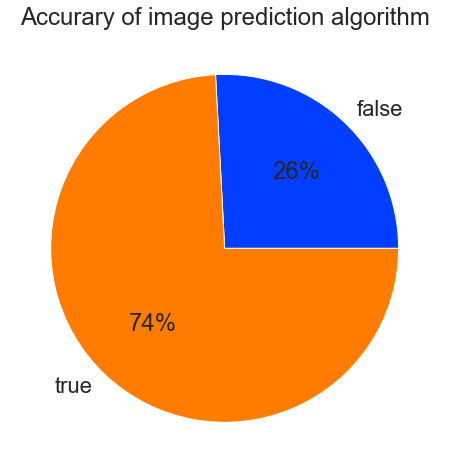

In [104]:
def plot_pie_chart():
    colors = sns.color_palette('bright')
    plt.title('Accurary of image prediction algorithm')
    labels = ['false', 'true']
    plt.pie(algo_pred, labels=labels,
            colors=colors, autopct='%.0f%%');

plot_pie_chart()

In [109]:
# def plot_vertical_bar():
#     sns.barplot('retweet_ratio', 'name', data=top_tweets)
#     sns.set_style("whitegrid")

#     plt.title('Most viral tweets')
#     plt.xlabel('Growth rate')
#     plt.ylabel('Tweet')

# plot_vertical_bar()

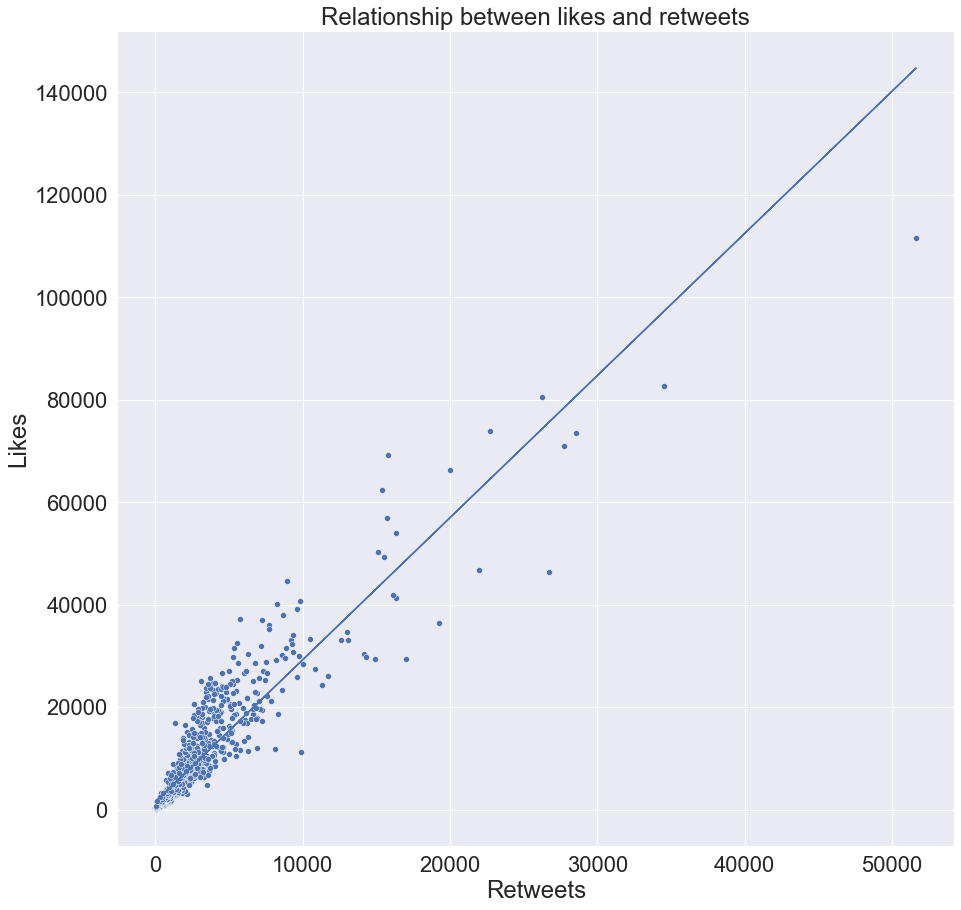

In [112]:
def plot_scatterplot():
    x_plot = np.array(retweets_v_likes['retweet_count'])
    y_plot = np.array(retweets_v_likes['like_count'])

    sns.scatterplot(x=x_plot, y=y_plot)

    sns.set(rc={"figure.figsize": (15, 15)}, font_scale=2)

    w = np.polyfit(x_plot, y_plot, 1)
    x = np.poly1d(w)

    # adding trendline to plot
    plt.plot(x_plot, x(x_plot))

    plt.title('Relationship between likes and retweets')
    plt.xlabel('Retweets')
    plt.ylabel('Likes')

plot_scatterplot()